# Lab 9 Balmer Series & Hydrogen-Deuterium Isotope Shift

Physics 202

Shreya Parjan + Alex G.

11/12/18

## Objective

The objective of this lab is to determine teh ratio of the nuclear masses of hydrogen and deuterium.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize
import math as m
%matplotlib notebook

In [73]:
Rh = 1.09677581e-3 #A^-1
muH = 9.10443e-31 #kg
mE = 9.10938356e-31 #kg
mhamu = 1.00727647 #u
u = 1.6605389e-27 #kg

#muD is mEmD/(mE+mD)
muD = ((9.11e-31)*(1.66e-27))/((9.11e-31)+(1.66e-27)) #kg

lambda3 = 1/(Rh*(.25-(1/3**2)))
lambda4 = 1/(Rh*(.25-(1/4**2)))
lambda5 = 1/(Rh*(.25-(1/5**2)))
lambda6 = 1/(Rh*(.25-(1/6**2)))
lambda7 = 1/(Rh*(.25-(1/7**2)))
balmerLambdas = np.array([lambda3,lambda4,lambda5,lambda6,lambda7]) #angstroms
print("the first 5 Balmer wavelengths are ",balmerLambdas)

massRatio = muD/muH
print("the ratio of the wavelengths is ",massRatio)

the first 5 Balmer wavelengths are  [6564.69620715 4862.73793122 4341.73029573 4102.93512947 3971.23597716]
the ratio of the wavelengths is  1.0000629603515467


<IPython.core.display.Javascript object>


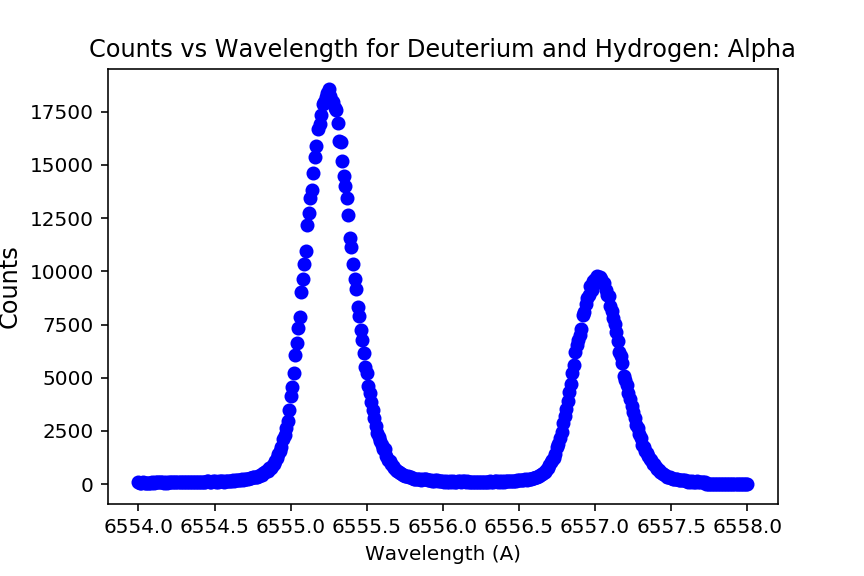

<IPython.core.display.Javascript object>


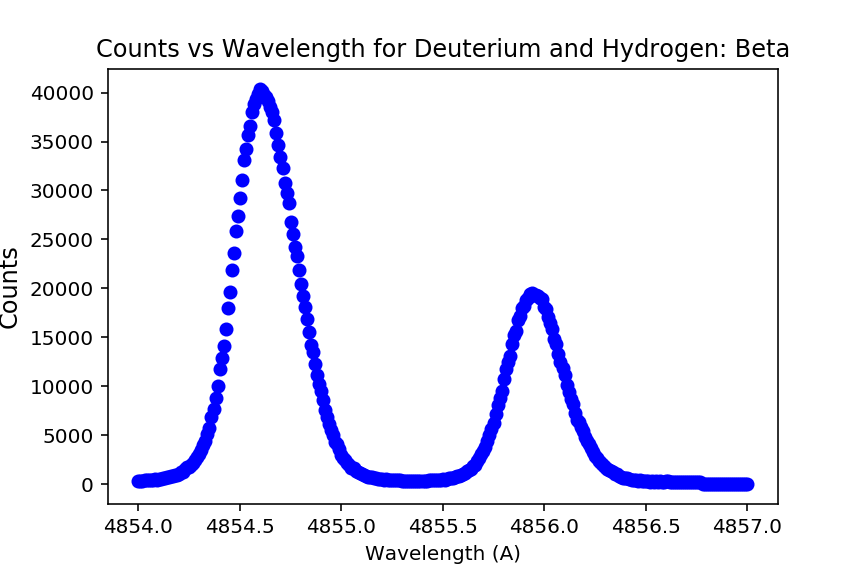

<IPython.core.display.Javascript object>


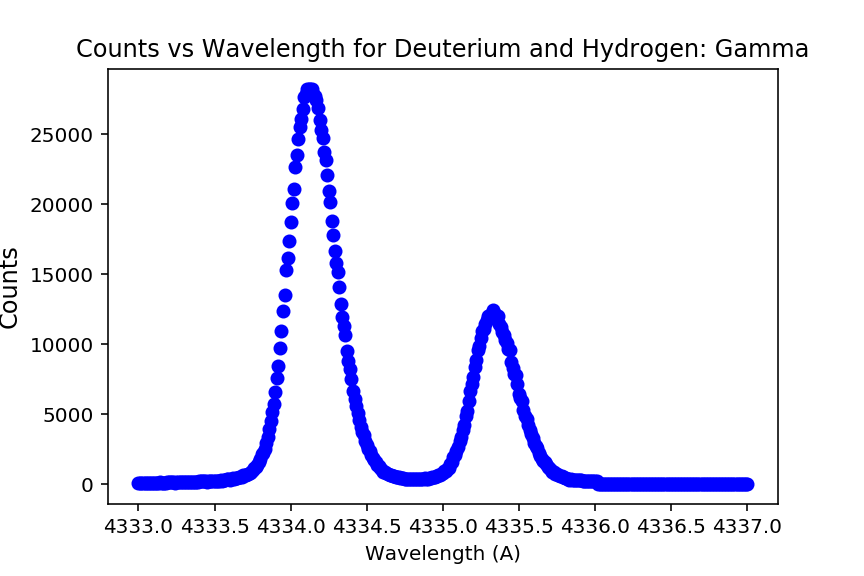

<IPython.core.display.Javascript object>


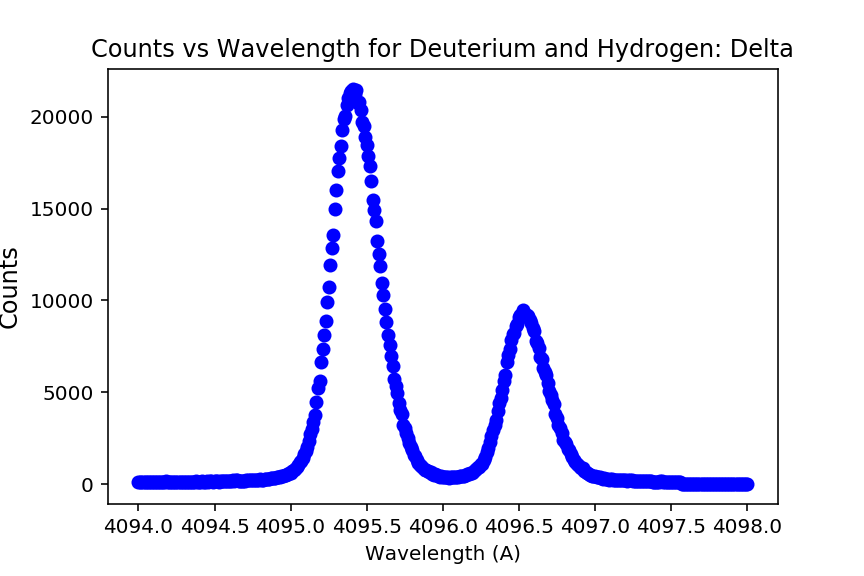

<IPython.core.display.Javascript object>


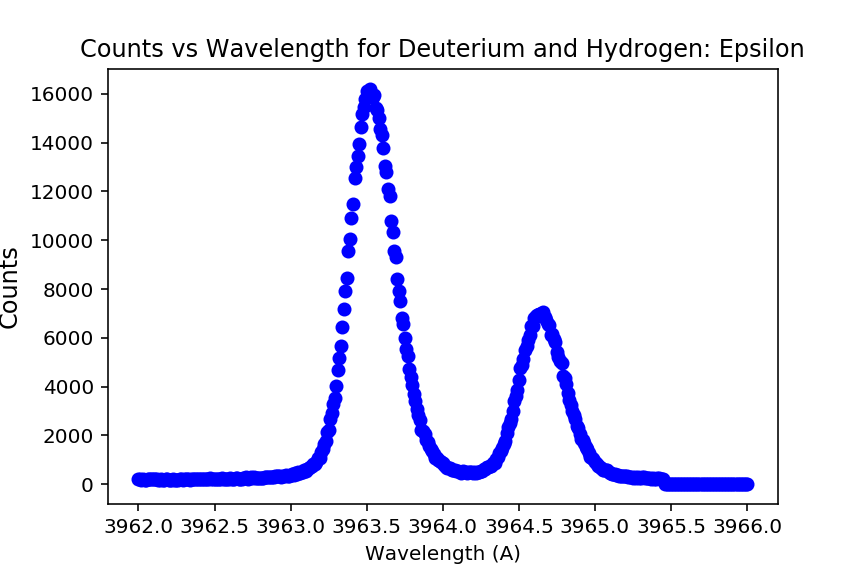

In [74]:
dataA = np.loadtxt('lab9alphaline.dat',delimiter = ',')
dataB = np.loadtxt('lab9betaline.dat',delimiter = ',')
dataG = np.loadtxt('lab9gammaline.dat',delimiter = ',')
dataD = np.loadtxt('lab9deltaline.dat',delimiter = ',')
dataE = np.loadtxt('lab9epsilonline.dat',delimiter = ',')

cA = dataA[:,1] #counts
lA = dataA[:,0] #wavelengths A

cB = dataB[:,1] #counts
lB = dataB[:,0] #wavelengths A

cG = dataG[:,1] #counts
lG = dataG[:,0] #wavelengths A

cD = dataD[:,1] #counts
lD = dataD[:,0] #wavelengths A

cE = dataE[:,1] #counts
lE = dataE[:,0] #wavelengths A

plt.figure()
plt.plot(lA, cA, 'bo') #without '-' after bo, plots points alone
plt.xlabel('Wavelength (A)') # label the x-axis
plt.ylabel('Counts', size=12) # label the y-axis
plt.title('Counts vs Wavelength for Deuterium and Hydrogen: Alpha') # title
plt.show()

plt.figure()
plt.plot(lB, cB, 'bo') #without '-' after bo, plots points alone
plt.xlabel('Wavelength (A)') # label the x-axis
plt.ylabel('Counts', size=12) # label the y-axis
plt.title('Counts vs Wavelength for Deuterium and Hydrogen: Beta') # title
plt.show()

plt.figure()
plt.plot(lG, cG, 'bo') #without '-' after bo, plots points alone
plt.xlabel('Wavelength (A)') # label the x-axis
plt.ylabel('Counts', size=12) # label the y-axis
plt.title('Counts vs Wavelength for Deuterium and Hydrogen: Gamma') # title
plt.show()

plt.figure()
plt.plot(lD, cD, 'bo') #without '-' after bo, plots points alone
plt.xlabel('Wavelength (A)') # label the x-axis
plt.ylabel('Counts', size=12) # label the y-axis
plt.title('Counts vs Wavelength for Deuterium and Hydrogen: Delta') # title
plt.show()

plt.figure()
plt.plot(lE, cE, 'bo') #without '-' after bo, plots points alone
plt.xlabel('Wavelength (A)') # label the x-axis
plt.ylabel('Counts', size=12) # label the y-axis
plt.title('Counts vs Wavelength for Deuterium and Hydrogen: Epsilon') # title
plt.show()

In [76]:
#wavelengths for hydrogen and deuterium from alpha to epsilon in A
ldE = 3963.52
lhE = 3964.63
ldD = 4095.39
lhD = 4096.52
ldG = 4334.11
lhG = 4335.35
ldB = 4854.6
lhB = 4855.93
ldA = 6555.26
lhA = 6557.03

lambdasH = np.array([lhA,lhB,lhG,lhD,lhE])
lambdasD = np.array([ldA,ldB,ldG,ldD,ldE])
ratios = lambdasH/lambdasD
avgRatio = np.mean(ratios)
print("avgRatio = ",avgRatio)
print("ratios = ",ratios)

sigma = (np.std(ratios))/(5**.5)
print("uncertainty in the value of the ratio of the reduced masses is ",sigma)
print("uncertainty in muD is ",(muH*sigma))
umuD = muH*sigma

muD = ratios*muH
print("muD = ", muD)
avgmuD = np.mean(muD)
print("avgmuD = ",avgmuD)

mD = (avgmuD)/(1-(avgmuD/mE))
print("mD = ",mD)

mdamu = mD/u
print("in amu, mD is ",mdamu)

print("the ratio md/mh is ",mdamu/mhamu)


umd = mD*((umuD/avgmuD)**2+(umuD/(mE-avgmuD))**2)**.5 #uncertainty in mass of deuterium
print("uncertainty in mD = " ,umd)

umdamu = umd/u
print("in amu, this is ",umdamu)

print("the mass of deuterium is 2.06 +/- 0.02 amu and the theoretical value does not fall within this range")

avgRatio =  1.0002772111583114
ratios =  [1.00027001 1.00027397 1.0002861  1.00027592 1.00028005]
uncertainty in the value of the ratio of the reduced masses is  2.458916415067618e-06
uncertainty in muD is  2.2387032376834074e-36
muD =  [9.10688831e-31 9.10692431e-31 9.10703480e-31 9.10694209e-31
 9.10697973e-31]
avgmuD =  9.106953849586063e-31
mD =  3.414346631731813e-27
in amu, mD is  2.056167808975636
the ratio md/mh is  2.041314247096069
uncertainty in mD =  3.1459342180161243e-29
in amu, this is  0.0189452605898972
the mass of deuterium is 2.06 +/- 0.02 amu and the theoretical value does not fall within this range


## Energy of fine structure splitting

<IPython.core.display.Javascript object>


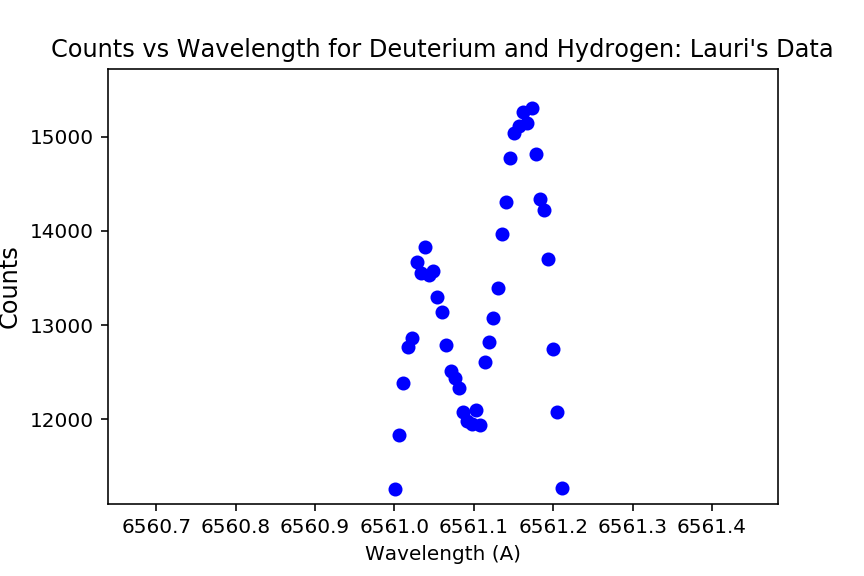

In [77]:
data = np.loadtxt('HDAlpha.txt',delimiter = ',')
c = data[:,1] #counts
l = data[:,0] #wavelengths A

plt.figure()
plt.plot(l, c, 'bo') #without '-' after bo, plots points alone
plt.xlabel('Wavelength (A)') # label the x-axis
plt.ylabel('Counts', size=12) # label the y-axis
plt.title("Counts vs Wavelength for Deuterium and Hydrogen: Lauri's Data") # title
plt.show()

In [1]:
hc = 12398 #eV*A

lam1 = 6561.04 #m
lam2 = 6561.18 #m

E1 = (hc)/lam1 #J
E2 = (hc)/lam2
deltaE = E1-E2

print(deltaE)
print("the energy difference is 40.3 meV which agrees with the accepted value of  40 +- 1 microeV!")

4.0320418375650036e-05
the energy difference is 40.3 meV which agrees with the accepted value of  40 +- 1 microeV!
